In [1]:
import os
os.chdir('/home/jaentrouble/hrnet_pretrain')
print(os.getcwd())

/home/jaentrouble/hrnet_pretrain


In [2]:
%matplotlib inline

In [3]:
!git pull

remote: Enumerating objects: 10, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 6 (delta 2), reused 6 (delta 2), pack-reused 0
Unpacking objects: 100% (6/6), 1.84 MiB | 1.51 MiB/s, done.
From https://github.com/jaentrouble/hrnet_pretrain
   475a0d5..18ada6b  master     -> origin/master
Updating 475a0d5..18ada6b
Fast-forward
 check_dataset.ipynb | 103 ++++++++++++++++++++++++++++++++++++----------------
 minus_one_val.ipynb |  40 ++++++++++++++++++++
 train_script.py     |  25 +------------
 val_label.json      |   2 +-
 4 files changed, 113 insertions(+), 57 deletions(-)
 create mode 100644 minus_one_val.ipynb


In [4]:
from model_trainer import create_train_dataset

In [5]:
img_dir = '/home/jaentrouble/data/imagenet/train'
img_names = os.listdir(img_dir)

In [6]:
import json

In [7]:
with open('meta.json','r') as f:
    label_dict=json.load(f)

In [8]:
with open('id_to_name.json','r') as f:
    names = json.load(f)

In [9]:
img_size = (240,320)
ds = create_train_dataset(
    img_dir,
    img_names,
    label_dict,
    img_size,
    32,
    buffer_size=1000,
)

In [10]:
sample = ds.take(5).as_numpy_iterator()

In [11]:
import matplotlib.pyplot as plt

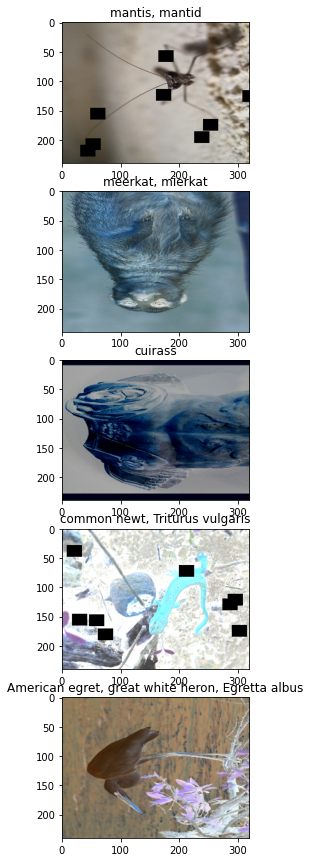

In [12]:
fig = plt.figure(figsize=(15,15))
for i, s in enumerate(sample):
    ax = fig.add_subplot(5,1,i+1)
    img = s[0][0]
    ax.imshow(img)
    ax.title.set_text(names[s[1][0]])
plt.show()

In [19]:
with open('val_label.json','r') as f:
    val_label = json.load(f)


In [20]:
from model_trainer import imagenet_val_dataset
val_dir = '/home/jaentrouble/data/imagenet/valid'
val_ds = imagenet_val_dataset(val_dir, val_label, img_size, 32)

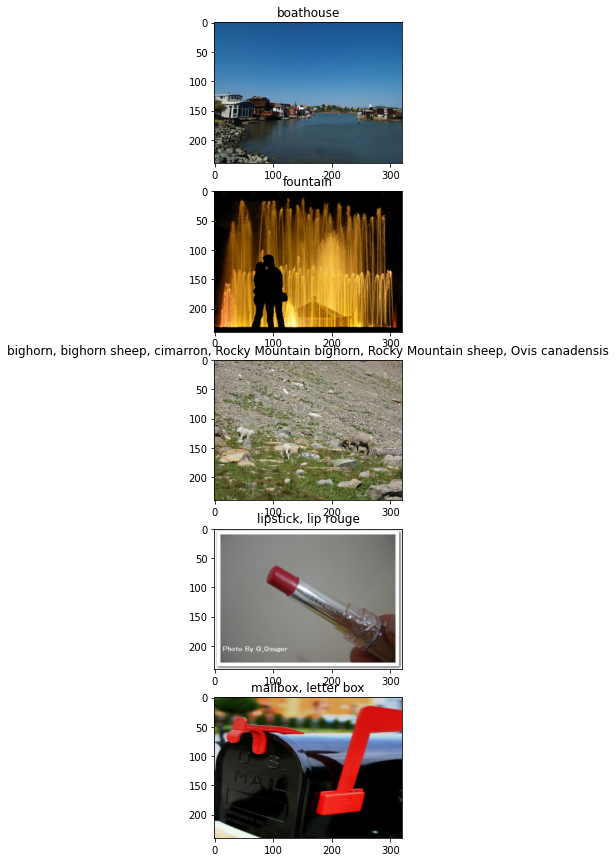

In [21]:
sample = val_ds.take(5).as_numpy_iterator()
fig = plt.figure(figsize=(15,15))
for i, s in enumerate(sample):
    ax = fig.add_subplot(5,1,i+1)
    img = s[0][0]
    ax.imshow(img)
    ax.title.set_text(names[s[1][0]])
plt.show()

In [22]:
val_names = sorted(os.listdir(val_dir))
print(val_names[:10])

['ILSVRC2012_val_00000001.JPEG', 'ILSVRC2012_val_00000002.JPEG', 'ILSVRC2012_val_00000003.JPEG', 'ILSVRC2012_val_00000004.JPEG', 'ILSVRC2012_val_00000005.JPEG', 'ILSVRC2012_val_00000006.JPEG', 'ILSVRC2012_val_00000007.JPEG', 'ILSVRC2012_val_00000008.JPEG', 'ILSVRC2012_val_00000009.JPEG', 'ILSVRC2012_val_00000010.JPEG']


In [23]:
import imageio

ILSVRC2012_val_00000001.JPEG
489
ILSVRC2012_val_00000002.JPEG
360
ILSVRC2012_val_00000003.JPEG
170
ILSVRC2012_val_00000004.JPEG
821
ILSVRC2012_val_00000005.JPEG
296


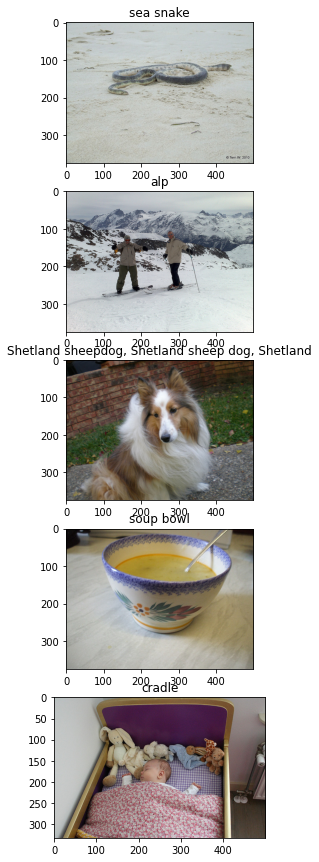

In [24]:
fig = plt.figure(figsize=(15,15))
for i,n in enumerate(val_names[:5]):
    print(n)
    print(val_label[i])
    ax = fig.add_subplot(5,1,i+1)
    ax.imshow(imageio.imread(val_dir+'/'+n))
    ax.title.set_text(names[val_label[i]])
plt.show()